In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
plt.style.use("seaborn-colorblind")
sns.color_palette("tab10")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

## Importing Data and Data Exploratory

In [279]:
data = pd.read_csv("data.csv")
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [155]:
data.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no


In [156]:
data.shape

(40000, 14)

In [157]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.6+ MB


In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

In [167]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


In [168]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,40000,NaN,NaN,NaN,40.5446,9.64178,19,33,39,48,95
job,40000,12,blue-collar,9383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,40000,3,married,24386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,40000,4,secondary,20993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,40000,2,no,39191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,40000,NaN,NaN,NaN,1274.28,2903.77,-8019,54,407,1319,102127
housing,40000,2,yes,24031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,40000,2,no,33070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,40000,3,cellular,24914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,40000,NaN,NaN,NaN,16.0172,8.27813,1,8,17,21,31


In [169]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

##### We dont have any duplicates and indeed missing data, i also checked types of variables and descriptive statistics for variables. Now i'm going to examine each variable individually and try to understand distrubitions.

blue-collar      23.4575
management       20.4150
technician       17.1300
admin            11.2075
services          9.7750
retired           3.5925
self-employed     3.5350
entrepreneur      3.5125
unemployed        2.7600
housemaid         2.7175
student           1.3100
unknown           0.5875
Name: job, dtype: float64

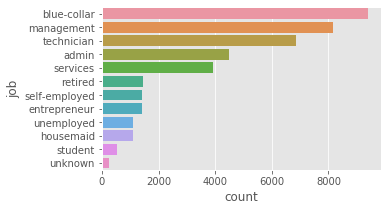

In [160]:
plt.figure(figsize=(5,3))
sns.countplot(y="job",data=data,order = data.job.value_counts().index);
data.job.value_counts(normalize=True)*100

##### Job variable has 12 unique group.There are some sparse or similar classes, which can be combined into a single category to simplify the prediction models. For example, the “entrepreneur” and “self-employed” categories, as well as “retired” and “unemployed” categories, can be combined into one.

In [170]:
data.job.replace(["entrepreneur"],"self-employed",inplace=True)
data.job.replace(["admin","management"],"administration",inplace=True)
data.job.replace(["technician"],"blue-collar",inplace=True)
data.job.replace(["retired","unemployed"],"not_active_income",inplace=True)
data.job.replace(["housemaid"],"services",inplace=True)

In [171]:
data = data[data.job != "unknown"]

blue-collar          40.827361
administration       31.809380
services             12.566327
self-employed         7.089149
not_active_income     6.390041
student               1.317742
Name: job, dtype: float64

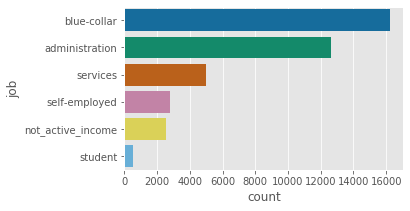

In [163]:
plt.figure(figsize=(5,3))
sns.countplot(y="job",data=data,order = data.job.value_counts().index);
data.job.value_counts(normalize=True)*100

##### After combined categories, there are 6 unique categories. The list of the types of jobs doesn’t look too comprehensive. Moreover, about 83% of all types of jobs in the dataset belong to just 3 categories — administration, blue-collar and services. In general, the limited number of the types of jobs may limit the predictive power of this variable. There was a small proportion of unknown job types, which was dropped from the dataset.

married     60.910348
single      27.245065
divorced    11.844587
Name: marital, dtype: float64

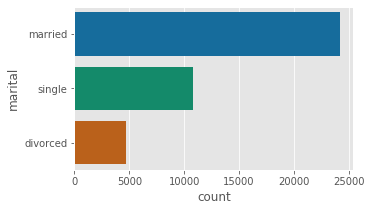

In [164]:
plt.figure(figsize=(5,3))
sns.countplot(y="marital",data=data,order = data.marital.value_counts().index);
data.marital.value_counts(normalize=True)*100

In [172]:
data.marital.replace("divorced","single",inplace=True)

married    60.910348
single     39.089652
Name: marital, dtype: float64

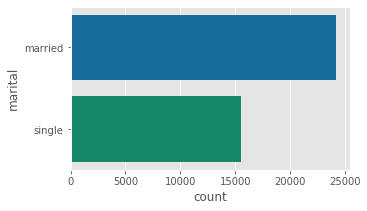

In [166]:
plt.figure(figsize=(5,3))
sns.countplot(y="marital",data=data,order = data.marital.value_counts().index);
data.marital.value_counts(normalize=True)*100

##### Same process that has been done in job variable has been implemented for marital variable as well. Single and divorced categories was combine into "single" category

secondary    52.641770
tertiary     28.115177
primary      15.654470
unknown       3.588583
Name: education, dtype: float64

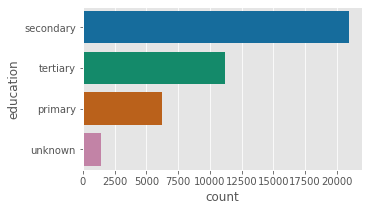

In [167]:
plt.figure(figsize=(5,3))
sns.countplot(y="education",data=data,order = data.education.value_counts().index);
data.education.value_counts(normalize=True)*100

In [173]:
data = data[data.education != "unknown"]

secondary    54.601179
tertiary     29.161667
primary      16.237154
Name: education, dtype: float64

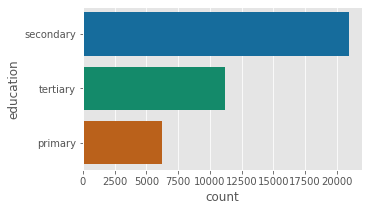

In [169]:
plt.figure(figsize=(5,3))
sns.countplot(y="education",data=data,order = data.education.value_counts().index);
data.education.value_counts(normalize=True)*100

##### There was a small proportion of unknown education level types, which was dropped from the dataset.More than 50% of targeted individuals have secondary school diploma. 

no     97.975899
yes     2.024101
Name: default, dtype: float64

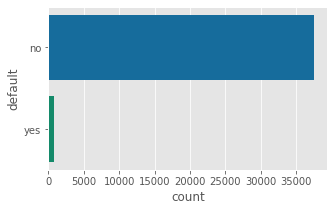

In [170]:
plt.figure(figsize=(5,3))
sns.countplot(y="default",data=data,order = data.default.value_counts().index);
data.default.value_counts(normalize=True)*100

#### There is a very small number of respondents who defaulted on a credit, so this variable doesn’t look very useful for prediction purposes but i will keep it because not want to lose data.

yes    60.590015
no     39.409985
Name: housing, dtype: float64

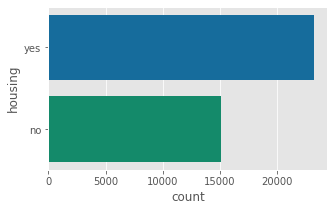

In [171]:
plt.figure(figsize=(5,3))
sns.countplot(y="housing",data=data,order = data.housing.value_counts().index);
data.housing.value_counts(normalize=True)*100

no     82.265637
yes    17.734363
Name: loan, dtype: float64

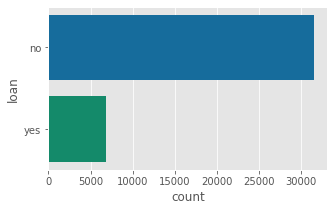

In [172]:
plt.figure(figsize=(5,3))
sns.countplot(y="loan",data=data,order = data.loan.value_counts().index);
data.loan.value_counts(normalize=True)*100

cellular     62.882779
unknown      31.412698
telephone     5.704523
Name: contact, dtype: float64

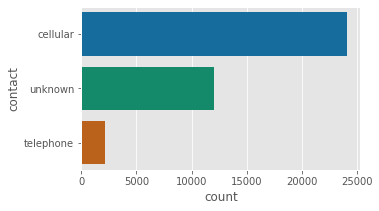

In [173]:
plt.figure(figsize=(5,3))
sns.countplot(y="contact",data=data,order = data.contact.value_counts().index);
data.contact.value_counts(normalize=True)*100

##### There is %31 propotion of unknown contact type. This variable does not seem useful for prediction purposes.Therefore i will drop it from dataset.

may    33.841098
jul    15.984141
aug    13.224477
jun    11.489906
nov     9.108456
apr     6.836559
feb     5.751474
jan     2.895300
mar     0.633836
oct     0.200845
dec     0.033909
Name: month, dtype: float64

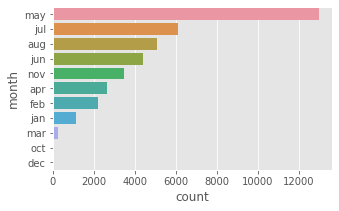

In [174]:
plt.figure(figsize=(5,3))
sns.countplot(y="month",data=data,order = data.month.value_counts().index);
data.month.value_counts(normalize=True)*100

##### Most of the respondents were contacted during the summer months, with more than 30% of all contacts happening in May. The month of contact can have a substantial impact on the desire to subscribe for a deposit (e.g., many people may be receiving salary bonuses at the end of the calendar year, which could be a good time to contact them about the deposit). This skewness of the previous campaigns’ efforts towards summer may potentially negatively impact the outcomes of the future campaigns, especially if the summer months prove to be negative predictors for campaign’s success.

no     92.717408
yes     7.282592
Name: y, dtype: float64

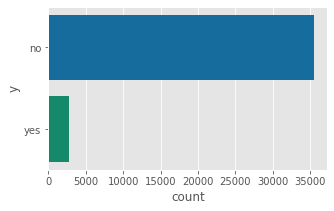

In [175]:
plt.figure(figsize=(5,3))
sns.countplot(y="y",data=data,order = data.y.value_counts().index);
data.y.value_counts(normalize=True)*100

##### Only 7.28% of the respondents to the current campaign have actually subscribed for a deposit as a result of the campaign. This makes our data set highly imbalanced and requires application of special methods to compensate for it

In [174]:
numeric_cols = data.select_dtypes(include="int64")
numeric_cols.head()

,age,balance,day,duration,campaign
0,58,2143,5,261,1
1,44,29,5,151,1
2,33,2,5,76,1
5,35,231,5,139,1
6,28,447,5,217,1


               age   balance       day  duration  campaign
age       1.000000  0.080457 -0.011415 -0.035758  0.015803
balance   0.080457  1.000000  0.011471  0.012667 -0.009732
day      -0.011415  0.011471  1.000000 -0.033605  0.167660
duration -0.035758  0.012667 -0.033605  1.000000 -0.086874
campaign  0.015803 -0.009732  0.167660 -0.086874  1.000000


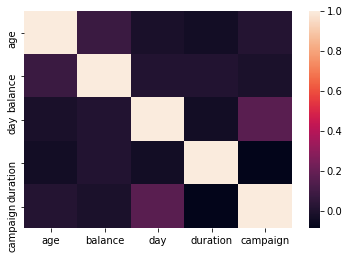

In [175]:
correlation = numeric_cols.corr()
sns.heatmap(correlation);
print(correlation)

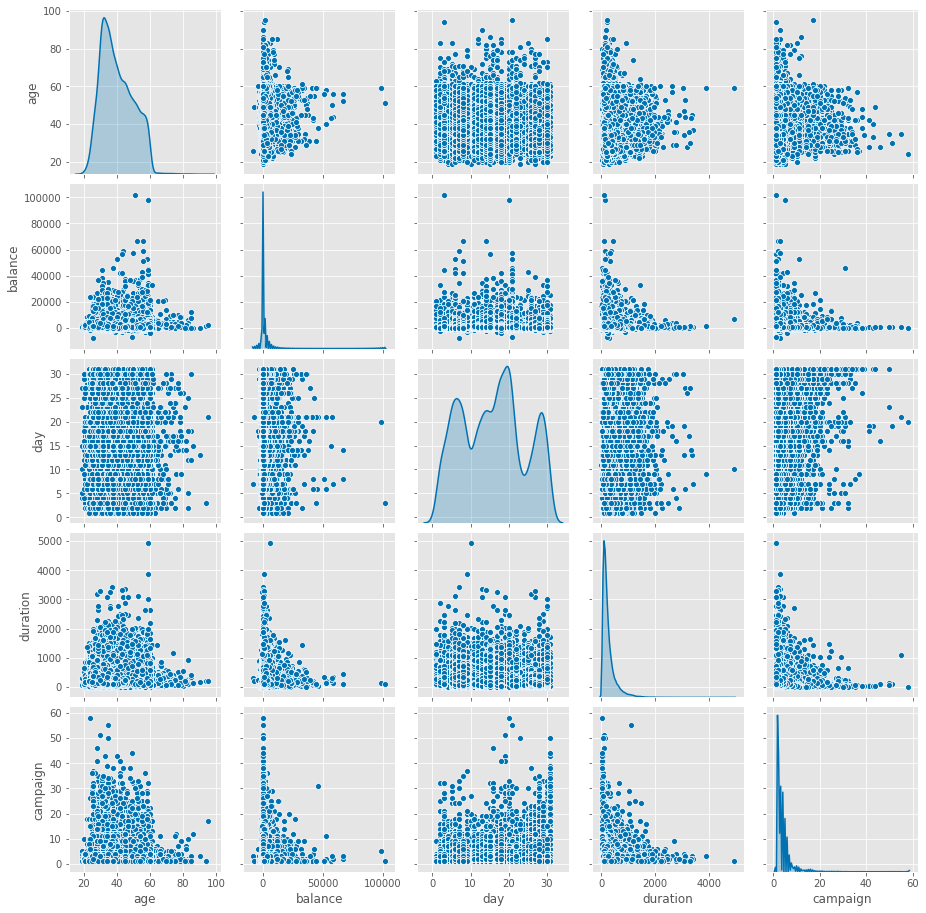

In [180]:
sns.pairplot(numeric_cols,diag_kind="kde");

##### There was no correlation between numerical variables. It can also be clearly seen that the distributions of variables do not come from the normal distribution.

In [176]:
data.drop(["contact"],1,inplace=True)

In [177]:
df= data.copy()

## Feature Engineering

##### Because of numeric variables not distribute normal,additionaly they have high skewness and kurtosis.Hence I'm going to group them according to ranges that I determined for each variable. And also I'm aiming make them more interpretable.Then I am going to use LabelEncoder and get_dummies function to make dataset ready for creating model.

In [178]:
age_range = [18,29,39,49,64,np.inf]
##age_group_names=["18-29","30-39","40-49","50-64","65+"]
df["age_group"] = pd.cut(df["age"],bins=age_range)
df.pivot_table(index="age_group",values="age",aggfunc=["mean","count","min","max"])

,mean,count,min,max
,age,age,age,age
age_group,,,,
"(18.0, 29.0]",26.865910,4139,19,29
"(29.0, 39.0]",34.263155,16002,30,39
"(39.0, 49.0]",44.208499,10331,40,49
"(49.0, 64.0]",54.661021,7735,50,64
"(64.0, inf]",72.335878,131,65,95


In [179]:
balance_range = [-np.inf,0,99,499,999,2999,5999,8999,np.inf]
#balance_group_names=["-0","1-99","100-499","500-999","1000-2999","3000-5999","6000-8999","9000+"]
df["balance_group"] = pd.cut(df["balance"],bins=balance_range)
df.groupby("balance_group")["balance"].agg([min,max,np.mean,len])

,min,max,mean,len
balance_group,,,,
"(-inf, 0.0]",-8019,0,-172.521661,6671
"(0.0, 99.0]",1,99,42.057759,4588
"(99.0, 499.0]",100,499,277.408661,9629
"(499.0, 999.0]",500,999,714.215913,5794
"(999.0, 2999.0]",1000,2999,1740.873931,7250
"(2999.0, 5999.0]",3000,5999,4185.390958,2765
"(5999.0, 8999.0]",6000,8990,7301.523375,877
"(8999.0, inf]",9002,102127,15844.496073,764


In [180]:
duration_range = [-np.inf,59,119,179,299,599,899,1119,1799,np.inf]
#duration_group_names=["-1","2","3","4-5","5-10","10-15","15-20","20-30","30+"]
df["duration_group"] = pd.cut(df["duration"],bins=duration_range)
df.groupby("duration_group")["duration"].agg([min,max,np.mean,len])

,min,max,mean,len
duration_group,,,,
"(-inf, 59.0]",0,59,34.755146,4178
"(59.0, 119.0]",60,119,90.009022,8091
"(119.0, 179.0]",120,179,148.057724,7328
"(179.0, 299.0]",180,299,231.965951,8576
"(299.0, 599.0]",300,599,412.337945,6939
"(599.0, 899.0]",600,899,720.585843,1992
"(899.0, 1119.0]",901,1119,996.753820,589
"(1119.0, 1799.0]",1120,1792,1333.921960,551
"(1799.0, inf]",1805,4918,2272.670213,94


In [181]:
campaign_range = [0,1,2,5,10,15,np.inf]
#campaign_group_names=["1-2","3-5","6-10","11-15","16+"]
df["campaign_group"] = pd.cut(df["campaign"],bins=campaign_range)
df.groupby("campaign_group")["campaign"].agg([min,max,np.mean,len])

,min,max,mean,len
campaign_group,,,,
"(0.0, 1.0]",1,1,1.000000,14101
"(1.0, 2.0]",2,2,2.000000,10676
"(2.0, 5.0]",3,5,3.666841,9548
"(5.0, 10.0]",6,10,7.233506,2895
"(10.0, 15.0]",11,15,12.557166,621
"(15.0, inf]",16,58,22.050302,497


In [182]:
df["month_num"] = df.month.map({"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"oct":10,"nov":11,"dec":12})
df.education = df.education.map({"primary":1,"secondary":2,"tertiary":3})

In [183]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,y,age_group,balance_group,duration_group,campaign_group,month_num
0,58,administration,married,3,no,2143,yes,no,5,may,261,1,no,"(49.0, 64.0]","(999.0, 2999.0]","(179.0, 299.0]","(0.0, 1.0]",5
1,44,blue-collar,single,2,no,29,yes,no,5,may,151,1,no,"(39.0, 49.0]","(0.0, 99.0]","(119.0, 179.0]","(0.0, 1.0]",5
2,33,self-employed,married,2,no,2,yes,yes,5,may,76,1,no,"(29.0, 39.0]","(0.0, 99.0]","(59.0, 119.0]","(0.0, 1.0]",5
5,35,administration,married,3,no,231,yes,no,5,may,139,1,no,"(29.0, 39.0]","(99.0, 499.0]","(119.0, 179.0]","(0.0, 1.0]",5
6,28,administration,single,3,no,447,yes,yes,5,may,217,1,no,"(18.0, 29.0]","(99.0, 499.0]","(179.0, 299.0]","(0.0, 1.0]",5


In [184]:
df.drop(["age","balance","duration","campaign","month"],1,inplace=True)

In [185]:
le = LabelEncoder()

In [186]:
df.marital = le.fit_transform(df.marital)
df.default = le.fit_transform(df.default)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.age_group = le.fit_transform(df.age_group)
df.balance_group = le.fit_transform(df.balance_group)
df.campaign_group = le.fit_transform(df.campaign_group)
df.duration_group = le.fit_transform(df.duration_group)
df.campaign_group = le.fit_transform(df.campaign_group)
df.duration_group = le.fit_transform(df.duration_group)
df.y = df.y.map({"no":0,"yes":1})

In [187]:
df.head()

,job,marital,education,default,housing,loan,day,y,age_group,balance_group,duration_group,campaign_group,month_num
0,administration,0,3,0,1,0,5,0,3,4,3,0,5
1,blue-collar,1,2,0,1,0,5,0,2,1,2,0,5
2,self-employed,0,2,0,1,1,5,0,1,1,1,0,5
5,administration,0,3,0,1,0,5,0,1,2,2,0,5
6,administration,1,3,0,1,1,5,0,0,2,3,0,5


In [188]:
df = pd.get_dummies(df,columns=["job"],drop_first=True)

In [189]:
df.head()

,marital,education,default,housing,loan,day,y,age_group,balance_group,duration_group,campaign_group,month_num,job_blue-collar,job_not_active_income,job_self-employed,job_services,job_student
0,0,3,0,1,0,5,0,3,4,3,0,5,0,0,0,0,0
1,1,2,0,1,0,5,0,2,1,2,0,5,1,0,0,0,0
2,0,2,0,1,1,5,0,1,1,1,0,5,0,0,1,0,0
5,0,3,0,1,0,5,0,1,2,2,0,5,0,0,0,0,0
6,1,3,0,1,1,5,0,0,2,3,0,5,0,0,0,0,0


## Creating and Fitting Predictive Model

In [190]:
y=df.y
y[:5]

0    0
1    0
2    0
5    0
6    0
Name: y, dtype: int64

In [191]:
X = df.drop("y",1)
X.head()

,marital,education,default,housing,loan,day,age_group,balance_group,duration_group,campaign_group,month_num,job_blue-collar,job_not_active_income,job_self-employed,job_services,job_student
0,0,3,0,1,0,5,3,4,3,0,5,0,0,0,0,0
1,1,2,0,1,0,5,2,1,2,0,5,1,0,0,0,0
2,0,2,0,1,1,5,1,1,1,0,5,0,0,1,0,0
5,0,3,0,1,0,5,1,2,2,0,5,0,0,0,0,0
6,1,3,0,1,1,5,0,2,3,0,5,0,0,0,0,0


In [222]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=11)

In [193]:
from sklearn.linear_model import LogisticRegression

In [218]:
loj_model= LogisticRegression(solver = "liblinear")
loj_params = {"penalty":["l1","l2"],"max_iter":[100,200,500,1000],"C":[0.1,0.01,1,0.001]}
loj_model_cv = GridSearchCV(loj_model,loj_params,cv=5,n_jobs=-1,verbose=2)
loj_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   13.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.01, 1, 0.001],
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [219]:
loj_model_cv.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l1'}

In [223]:
loj = LogisticRegression(solver = "liblinear",C=1,penalty="l1",max_iter=100)
loj_tuned = loj.fit(X_train,y_train)
loj_tuned

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [224]:
y_pred = loj_tuned.predict(X_test)
print("Logistic Regresyon Model Accuracy Score : %.2f"%accuracy_score(y_test, y_pred))
cv_scores = cross_val_score(loj_tuned, X_test, y_test, cv = 5,scoring="roc_auc")
print(cv_scores)
print("Average of Cross-Validation Scores : %.2f"%cv_scores.mean())

Logistic Regresyon Model Accuracy Score : 0.93
[0.87716553 0.88475139 0.89411765 0.88949593 0.87870922]
Average of Cross-Validation Scores : 0.88


In [200]:
from sklearn.ensemble import RandomForestClassifier

In [265]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [266]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2)

In [267]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 32.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [268]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [201]:
rf_tuned = RandomForestClassifier(max_depth=10,max_features=8,min_samples_split=5,n_estimators=1000)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [203]:
y_pred = rf_tuned.predict(X_test)
print("Random Forest Classifier Model Accuracy Score : %.2f"%accuracy_score(y_test, y_pred))
cv_scores = cross_val_score(rf_tuned, X_test, y_test, cv = 5,scoring="roc_auc")
print(cv_scores)
print("Average of Cross-Validation Scores : %.2f"%cv_scores.mean())

Random Forest Classifier Model Accuracy Score : 0.94
[0.94566071 0.93021717 0.93400166 0.93941092 0.92922026]
Average of Cross-Validation Scores : 0.94


##### Lojistic Regresyon and Random Forest Classifier was used as classifier and obtained accuracy scores 0.93 and 0.94 respectively. When we look at 5 folds cross validation scores,rf model seems better predictor than lojistic regression.Hence,I have chosen rf model to dive deeper to analyze which feature or features are more important than others.  Reguested accuracy is 81% so that I'll not perform any other classifier such as Gradient Boosting,Extreme XBoost,SVC instead I focus other 2 bonus questions.

## Feature Importances

In [230]:
rf_tuned.feature_importances_

array([0.01714074, 0.02248396, 0.00457632, 0.0280692 , 0.00997819,
       0.12967289, 0.04302555, 0.04812238, 0.50496948, 0.03402699,
       0.11849102, 0.01097467, 0.007447  , 0.00682683, 0.00779697,
       0.00639783])

In [232]:
importances = pd.DataFrame({"Feature":X_train.columns.T,"coeff":rf_tuned.feature_importances_.T*100}).sort_values(by="coeff",ascending=False)
importances.head(5)

,Feature,coeff
8,duration_group,50.496948
5,day,12.967289
10,month_num,11.849102
7,balance_group,4.812238
6,age_group,4.302555


In [226]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif,f_classif

In [227]:
fs = SelectKBest(score_func=mutual_info_classif,k="all")
fs.fit(X_train,y_train)
##scaled_X_test = scaler.transform(X_test)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [229]:
fs_df = pd.DataFrame({"Feature":X_train.columns.T,"coeff":fs.scores_.T*100}).sort_values(by="coeff",ascending=False)
fs_df.head(5)

,Feature,coeff
8,duration_group,7.142436
10,month_num,1.368301
5,day,0.576155
6,age_group,0.512006
3,housing,0.451344


##### Two different methods were implied to examine which features should we focus on.In the tables, top 5 features which have biggest importance coefficient were shown. In both table it can be seen that contact duration,day of month and month are most important features. I will focus these 3 variables and examine with charts which indicate that  how  rate of customers who  interested in term deposit change by for each variables indivudually.   

In [233]:
age_range = [18,29,39,49,64,np.inf]
age_group_names=["18-29","30-39","40-49","50-64","65+"]
data["age_group"] = pd.cut(data["age"],bins=age_range,labels=age_group_names)

In [234]:
balance_range = [-np.inf,0,99,499,999,2999,5999,8999,np.inf]
balance_group_names=["-0","1-99","100-499","500-999","1000-2999","3000-5999","6000-8999","9000+"]
data["balance_group"] = pd.cut(data["balance"],bins=balance_range,labels=balance_group_names)

In [235]:
duration_range = [-np.inf,59,119,179,299,599,899,1119,1799,np.inf]
duration_group_names=["-1","2","3","4-5","5-10","10-15","15-20","20-30","30+"]
data["duration_group"] = pd.cut(data["duration"],bins=duration_range,labels=duration_group_names)

In [236]:
campaign_range = [0,1,2,5,10,15,np.inf]
campaign_group_names=["1","2","3-5","6-10","11-15","16+"]
data["campaign_group"] = pd.cut(data["campaign"],bins=campaign_range,labels=campaign_group_names)

In [240]:
data["y_numb"] = data["y"].map({"no":0,"yes":1})

                   y_numb
duration_group           
-1               0.095740
2                1.198863
3                2.347162
4-5              3.474813
5-10            10.693183
10-15           37.600402
15-20           57.555178
20-30           61.887477
30+             53.191489


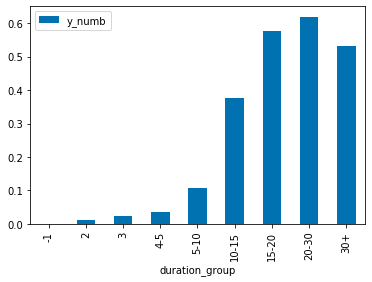

In [243]:
# % of beign interested in term deposit by duration
print(data[["duration_group","y_numb"]].groupby(by="duration_group",as_index=True).mean()*100)
data[["duration_group","y_numb"]].groupby(by="duration_group",as_index=True).mean().plot(kind="bar");

##### The chart and table show that respondents who were contacted 10 minutes or more tend to accept the time deposit campaign offered. 20-30 minutes is the most effective contact duration for a deposit subscription campaign. 60% of customers were contacted between 20-30 minutes are interested in subscription for the deposit term. 

          y_numb
month           
apr    16.291492
aug     5.562130
dec     7.692308
feb    11.156463
jan     3.153153
jul     5.988903
jun     6.424518
mar    51.028807
may     5.888700
nov     6.156930
oct    62.337662


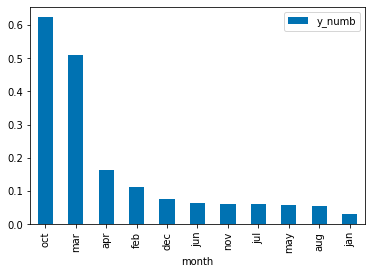

In [252]:
# % of beign interested in term deposit by month
print(data[["month","y_numb"]].groupby(by="month",as_index=True).mean()*100)
data[["month","y_numb"]].groupby(by="month",as_index=True).mean().sort_values(by="y_numb",ascending=False).plot(kind="bar");

##### The graph and table show that respondents contacted in October and March are more likely to accept the term deposit campaign offered. October is the most effective month for the deposit subscription campaign. 62% of customers were contacted in October are interested in subscription for the term deposit.

        y_numb
day           
1    22.222222
30   15.362319
10   12.429379
25   10.355030
4     9.929078


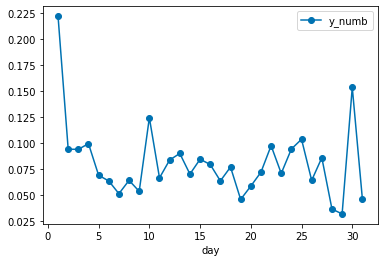

In [264]:
print((data[["day","y_numb"]].groupby(by="day",as_index=True).mean()*100).sort_values(by="y_numb",ascending=False).head())
data[["day","y_numb"]].groupby(by="day",as_index=True).mean().plot(kind="line",marker="o");

##### The graph and table show that respondents who were contacted on the first or last day of the month are more likely to accept the term deposit campaign offered. The first days of the month are the most effective communication days for the deposit subscription campaign. 22% of customers interviewed on the first day of the month are interested in deposit term subscription.

### Clustering and Customer Segmentation

In [33]:
from sklearn.cluster import KMeans

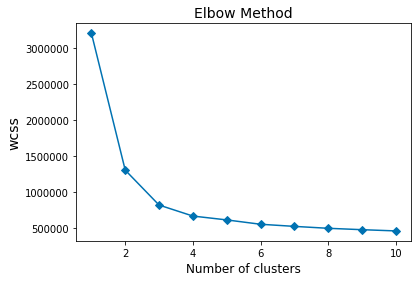

In [265]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=11)
    km.fit(cluster_df)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss,marker="D")
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

##### The elbow method was used to decide the optimal number of clusters. As seen in the graph, the appropriate number of clusters was decided to be 3. 

In [34]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=10, n_init=10, random_state=11)

In [37]:
cluster_df = df.copy()

In [38]:
clusters = kmeans.fit(cluster_df)

In [40]:
segments = clusters.labels_

##### Kmeans model implied above and classes predicted. PCA method was used to make easier to visualize distribution of predicted clusters.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
pca_fit = pca.fit(cluster_df)
pca_2d = pca.transform(cluster_df)

In [76]:
pca.explained_variance_ratio_

array([0.82031085, 0.06354977])

##### According to PCA model, approximately 88% of total variance able to be explained by 2 components.It means distribition of classes can be visualized confidently in 2D chart. 

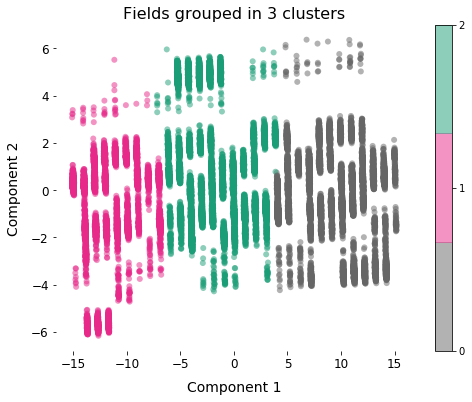

In [75]:
fig, ax = plt.subplots(figsize = (8, 6))

plt.scatter(pca_2d[:, 0], pca_2d[:, 1],
            c=segments, 
            edgecolor="none", 
            cmap=plt.cm.get_cmap("Dark2_r",3),
            alpha=0.5)
        
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel("Component 1", size = 14, labelpad=10)
plt.ylabel("Component 2", size = 14, labelpad=10)

plt.title('Fields grouped in 3 clusters', size=16)


plt.colorbar(ticks=[0, 1, 2]);

plt.show()

##### 3 discrete groups that will be called segments obtained explicitly. In light of the feature importances,I will try to understand what features makes the differences between segments. 

In [267]:
data["segment"] = segments

In [272]:
data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,y,age_group,balance_group,duration_group,campaign_group,y_numb,segment
0,58,administration,married,tertiary,no,2143,yes,no,5,may,261,1,no,50-64,1000-2999,4-5,1,0,0
1,44,blue-collar,single,secondary,no,29,yes,no,5,may,151,1,no,40-49,1-99,3,1,0,0
2,33,self-employed,married,secondary,no,2,yes,yes,5,may,76,1,no,30-39,1-99,2,1,0,0
5,35,administration,married,tertiary,no,231,yes,no,5,may,139,1,no,30-39,100-499,3,1,0,0
6,28,administration,single,tertiary,no,447,yes,yes,5,may,217,1,no,18-29,100-499,4-5,1,0,0


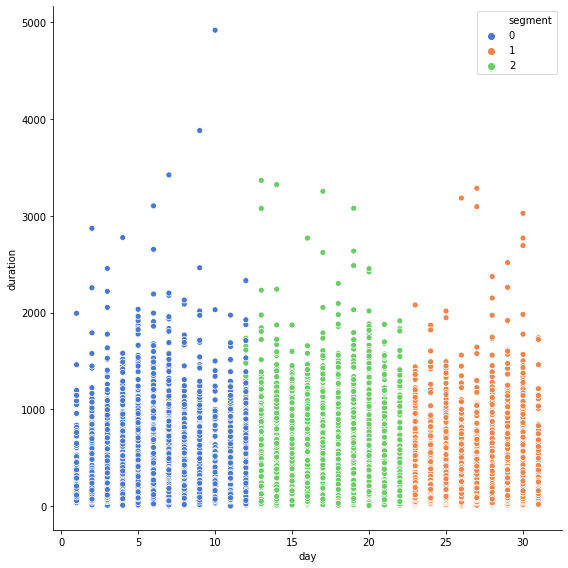

In [277]:
g = sns.FacetGrid(data,height=8,aspect=1)
g.map(sns.scatterplot,"day","duration","segment",palette="muted")
plt.legend();

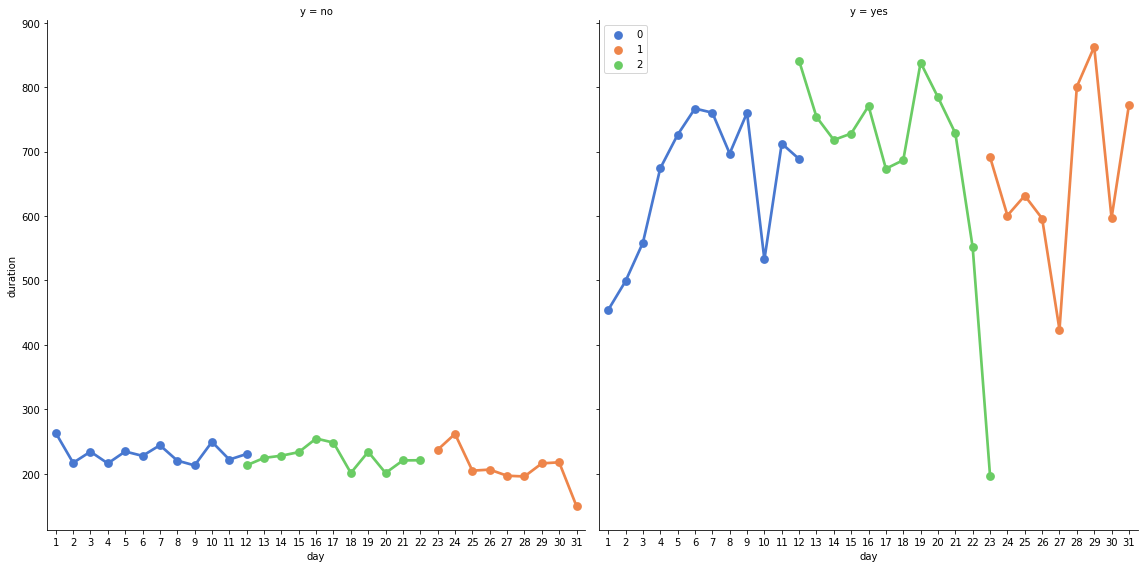

In [151]:
g = sns.FacetGrid(data,col="y",height=8,aspect=1)
g.map(sns.pointplot,"day","duration","segment",palette="muted",ci=False)
plt.legend();

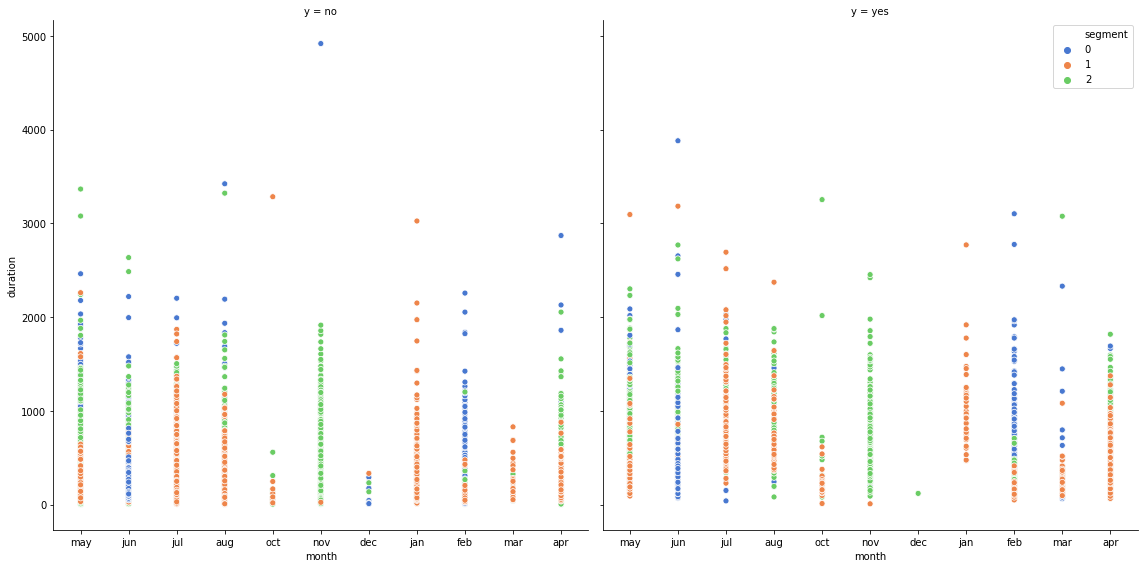

In [273]:
g = sns.FacetGrid(data,col="y",height=8,aspect=1)
g.map(sns.scatterplot,"month","duration","segment",palette="muted")
plt.legend();

##### The day of contact has a great effect in separating the segments. The differentiation of pay days, loan payment days, or other income and expense days of customers can play an important role in this. 

##### As a conclusion, the duration of the call should be kept as long as possible and customers should be contacted according to the payment days to increase the likelihood of receiving a positive response.

In [ ]:
data.to_csv("powerbidata.csv",index=False)